# Working with complicated dataset

Your name: Yar Moradpour

### Question 1

blast_results: https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv

Read in the data from the csv file above. Skip all the comment lines, create a header for the dataframe based on the fields list in the comment line that starts with **# Fields:**. Drop the first column `query acc.ver`. Set the `subject acc.ver` as the index of the dataframe. The last column of the dataframe should be `publications`. Show the first five rows of the resulting dataframe.

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv', skiprows=7, header=None)
print(df.head())
print(df.columns)

            0            1        2    3   4   5   6    7   8    9   10   11  \
0  YP_220550.1  NP_904328.1  100.000  318   0   0   1  318   1  318   0  629   
1  YP_220550.1   AGK29621.1   99.686  318   1   0   1  318   1  318   0  629   
2  YP_220550.1  YP_220563.1   99.686  318   1   0   1  318   1  318   0  627   
3  YP_220550.1   ACM24502.1   99.686  318   1   0   1  318   1  318   0  627   
4  YP_220550.1   AHG32084.1   99.371  318   2   0   1  318   1  318   0  627   

       12        13  14   15  
0  100.00    1,487    9  NaN  
1  100.00   17,947   47  NaN  
2  100.00   12,106   13  NaN  
3   99.69    2,319   41  NaN  
4  100.00   18,964    3  NaN  
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype='int64')


In [12]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,YP_220550.1,NP_904328.1,100.000,318,0,0,1,318,1,318,0,629,100.00,"1,487",9,NaN
1,YP_220550.1,AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.00,"17,947",47,NaN
2,YP_220550.1,YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100.00,"12,106",13,NaN
3,YP_220550.1,ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69,"2,319",41,NaN
4,YP_220550.1,AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.00,"18,964",3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,YP_220550.1,ABX45285.1,92.767,318,23,0,1,318,1,318,0,551,97.48,"17,348",6,NaN
96,YP_220550.1,ASP44815.1,93.375,317,21,0,1,317,1,317,0,551,96.85,"7,105",19,NaN
97,YP_220550.1,YP_009414156.1,84.543,317,49,0,1,317,1,317,0,551,94.01,"18,940",37,NaN
98,YP_220550.1,YP_009414363.1,85.174,317,47,0,1,317,1,317,0,551,94.01,"18,762",5,NaN


In [13]:
### Your code here . . .
#there seems to be no columns indicated need to assign to each column
columns = [
    "query acc.ver", "subject acc.ver", "% identity", "alignment length",
    "mismatches", "gap opens", "q. start", "q. end", "s. start", "s. end",
    "evalue", "bit score", "% positives", "bonds", "publications", "extra_column"
]
df.columns = columns
df = df.drop(columns=["query acc.ver", "extra_column"])


In [14]:
df

,subject acc.ver,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications
0,NP_904328.1,100.000,318,0,0,1,318,1,318,0,629,100.00,"1,487",9
1,AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.00,"17,947",47
2,YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100.00,"12,106",13
3,ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69,"2,319",41
4,AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.00,"18,964",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,ABX45285.1,92.767,318,23,0,1,318,1,318,0,551,97.48,"17,348",6
96,ASP44815.1,93.375,317,21,0,1,317,1,317,0,551,96.85,"7,105",19
97,YP_009414156.1,84.543,317,49,0,1,317,1,317,0,551,94.01,"18,940",37
98,YP_009414363.1,85.174,317,47,0,1,317,1,317,0,551,94.01,"18,762",5


### Question 2
What is the average number of publications?

In [15]:
### Your code here . . .
#convert to numberic so i can get the mean
df.publications = pd.to_numeric(df.publications, errors='coerce')
print(f"The average number of publications are {df.publications.mean():.2f}")

The average number of publications are 26.99


### Question 3
List the `subject acc.ver` that has over 15,000 bonds.

In [16]:
df['bonds'].head(2)

,bonds
0,"1,487"
1,"17,947"


In [17]:
### Your code here . . .
#replacing the comma and conver the column into float to be able to filter the data
#set

df['bonds'] = df['bonds'].str.replace(",", "").astype('float64')



In [18]:
df.loc[df['bonds'] > 15000, ['subject acc.ver','bonds']]


,subject acc.ver,bonds
1,AGK29621.1,17947.0
4,AHG32084.1,18964.0
6,6G2J_H,15663.0
12,YP_002791042.1,15830.0
17,AGK29634.1,17381.0
18,0806162F,17499.0
21,YP_009112408.1,16861.0
22,YP_001876469.1,16274.0
24,YP_009092269.1,16170.0
25,AHG32149.1,19706.0


### Question 4
Create a plot that shows the correlation between `% identity` and `% positives`.

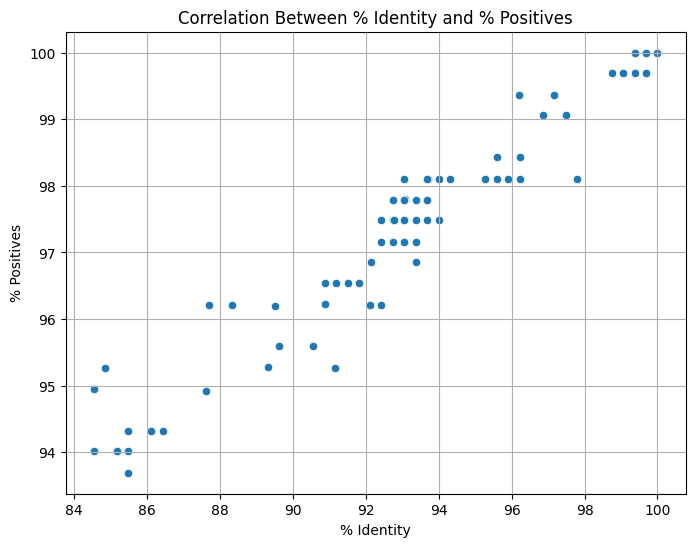

In [19]:
### Your code here . . .
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="% identity", y="% positives")
plt.title("Correlation Between % Identity and % Positives")
plt.xlabel("% Identity")
plt.ylabel("% Positives")
plt.grid(True)
plt.show()

### Question  5
Add a column `Protein source` to the dataframe from Question 1 based on the data in this csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv. Merge the data when the `subject acc.ver` from the dataframe equals to `Protein` in the csv file. Entries without a matching protein will have `NA` as `Protein source`.

In [20]:
### Your code here . . .
df_proterin_source = pd.read_csv('https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv')
df = df.reset_index()
df = df.merge(df_proterin_source, how="left", left_on="subject acc.ver", right_on="Protein")
df = df.set_index("subject acc.ver")
df.head()


,index,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications,Unnamed: 0,Protein,Source
subject acc.ver,,,,,,,,,,,,,,,,,
NP_904328.1,0,100.000,318,0,0,1,318,1,318,0,629,100.00,1487.0,9.0,0.0,NP_904328.1,RefSeq
AGK29621.1,1,99.686,318,1,0,1,318,1,318,0,629,100.00,17947.0,47.0,NaN,NaN,NaN
YP_220563.1,2,99.686,318,1,0,1,318,1,318,0,627,100.00,12106.0,13.0,2.0,YP_220563.1,GenPept
ACM24502.1,3,99.686,318,1,0,1,318,1,318,0,627,99.69,2319.0,41.0,NaN,NaN,NaN
AHG32084.1,4,99.371,318,2,0,1,318,1,318,0,627,100.00,18964.0,3.0,NaN,NaN,NaN
